In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [ ]:
f = pd.read_csv (r'C:\Users\shahb\OneDrive\Desktop\data\full_dataset_CA_sorted.csv')
print(f)

        Unnamed: 0  fips        date  PRECTOT      PS  QV2M   T2M  T2MDEW  \
0                0  6001  2000-01-01     0.12   99.77  5.97  7.89    6.28   
1             5753  6001  2000-01-02     0.00  100.53  4.46  6.04    2.01   
2             4620  6001  2000-01-03     0.10  100.92  4.85  7.73    3.39   
3             5120  6001  2000-01-04     0.27  100.90  6.11  8.36    6.77   
4             5119  6001  2000-01-05     0.00  100.52  4.13  7.32    0.75   
...            ...   ...         ...      ...     ...   ...   ...     ...   
444913      437633  6115  2020-12-27     0.00   95.37  4.26  5.23    0.91   
444914      437632  6115  2020-12-28     0.36   95.13  4.26  5.70    0.89   
444915      437631  6115  2020-12-29     0.00   96.29  3.41  4.37   -2.01   
444916      441446  6115  2020-12-30     8.48   96.44  3.43  5.86   -1.93   
444917      444917  6115  2020-12-31     0.81   96.09  4.85  5.64    2.78   

        T2MWET  T2M_MAX  ...    TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANG

In [ ]:
f['date'] = pd.to_datetime(f.date, format='%Y-%m-%d')

In [ ]:
f['date']

0        2000-01-01
1        2000-01-02
2        2000-01-03
3        2000-01-04
4        2000-01-05
            ...    
444913   2020-12-27
444914   2020-12-28
444915   2020-12-29
444916   2020-12-30
444917   2020-12-31
Name: date, Length: 444918, dtype: datetime64[ns]

In [ ]:
year = f['date'].dt.year.unique()
print(year)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]


In [ ]:
df = pd.DataFrame(f, columns = ['fips', 'date','score'])
df

,fips,date,score
0,6001,2000-01-01,NaN
1,6001,2000-01-02,NaN
2,6001,2000-01-03,NaN
3,6001,2000-01-04,0.6079
4,6001,2000-01-05,NaN
...,...,...,...
444913,6115,2020-12-27,NaN
444914,6115,2020-12-28,NaN
444915,6115,2020-12-29,3.2744
444916,6115,2020-12-30,NaN


In [ ]:
df = df[df['score'].notna()]
df

,fips,date,score
3,6001,2000-01-04,0.6079
10,6001,2000-01-11,0.5036
17,6001,2000-01-18,0.0000
24,6001,2000-01-25,0.0000
31,6001,2000-02-01,0.0000
...,...,...,...
444887,6115,2020-12-01,3.2744
444894,6115,2020-12-08,3.2744
444901,6115,2020-12-15,3.2744
444908,6115,2020-12-22,3.2744


In [ ]:
df['score'] = df['score'].round()
df

<ipython-input-8-edc756d0112b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['score'].round()


,fips,date,score
3,6001,2000-01-04,1.0
10,6001,2000-01-11,1.0
17,6001,2000-01-18,0.0
24,6001,2000-01-25,0.0
31,6001,2000-02-01,0.0
...,...,...,...
444887,6115,2020-12-01,3.0
444894,6115,2020-12-08,3.0
444901,6115,2020-12-15,3.0
444908,6115,2020-12-22,3.0


In [ ]:
count=[]
for i in year:
    x=df[df['date'].dt.year == i]['score']
#     print(x)
    count.append(x.value_counts())
#print(count)
# print(count[0])
print(count[5])

0.0    2917
1.0      83
2.0      16
Name: score, dtype: int64


In [ ]:
final_df=pd.DataFrame(count, index=year)
final_df

,0.0,1.0,2.0,3.0,4.0,5.0
2000,2795.0,221.0,NaN,NaN,NaN,NaN
2001,1365.0,794.0,367.0,289.0,201.0,NaN
2002,1216.0,1259.0,324.0,169.0,106.0,NaN
2003,2330.0,386.0,242.0,46.0,12.0,NaN
2004,1270.0,1119.0,503.0,124.0,NaN,NaN
2005,2917.0,83.0,16.0,NaN,NaN,NaN
2006,2793.0,219.0,4.0,NaN,NaN,NaN
2007,316.0,458.0,1255.0,664.0,323.0,NaN
2008,439.0,584.0,1236.0,803.0,12.0,NaN
2009,80.0,454.0,1296.0,1094.0,92.0,NaN


In [ ]:
final_df=final_df.fillna(0)

final_df

,0.0,1.0,2.0,3.0,4.0,5.0
2000,2795.0,221.0,0.0,0.0,0.0,0.0
2001,1365.0,794.0,367.0,289.0,201.0,0.0
2002,1216.0,1259.0,324.0,169.0,106.0,0.0
2003,2330.0,386.0,242.0,46.0,12.0,0.0
2004,1270.0,1119.0,503.0,124.0,0.0,0.0
2005,2917.0,83.0,16.0,0.0,0.0,0.0
2006,2793.0,219.0,4.0,0.0,0.0,0.0
2007,316.0,458.0,1255.0,664.0,323.0,0.0
2008,439.0,584.0,1236.0,803.0,12.0,0.0
2009,80.0,454.0,1296.0,1094.0,92.0,0.0


In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
def f(y):
    pl = final_df[final_df.index==y]
#     sprint(final_df[final_df.index==year])
    pl.plot(kind='bar')
    plt.show()

In [ ]:
interact(f,y=final_df.index)

interactive(children=(Dropdown(description='y', options=(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,…

<function __main__.f(y)>

<Figure size 432x288 with 0 Axes>

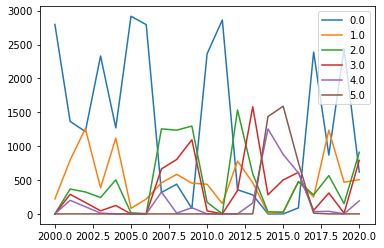

In [ ]:
plt.figure(); final_df.plot();

<AxesSubplot:>

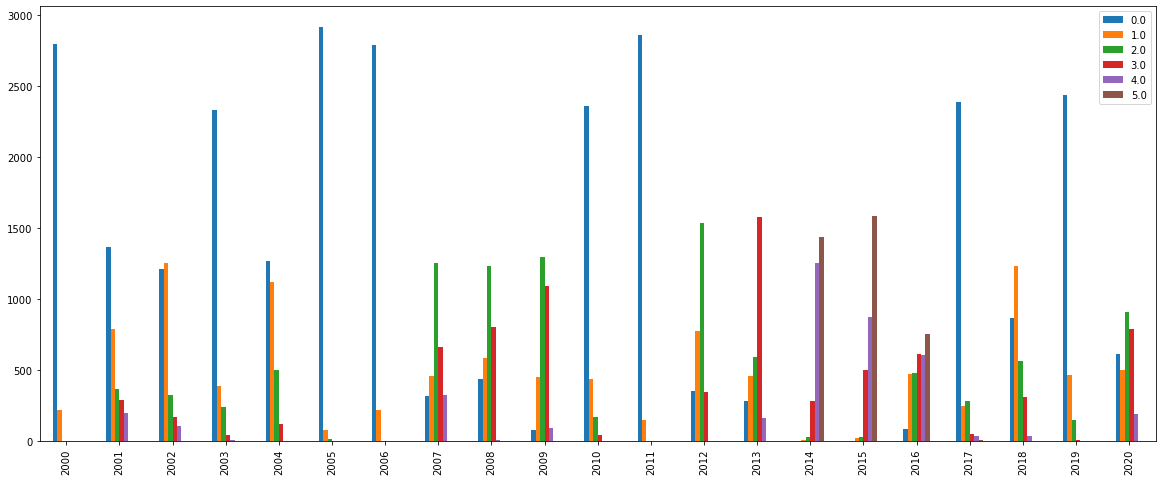

In [ ]:
# plt.plot(final_df.index[0], final_df[0][2000],color='red')
# # final_df[0][2000]
# plt.show()
final_df.plot.bar(figsize=(20,8))
# for i,j in final_df.iterrows():
#     print(i,j)
#     plt.annotate(i,j)

In [ ]:
final=final_df.T
final
x=list(final_df.index)

In [ ]:
x

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

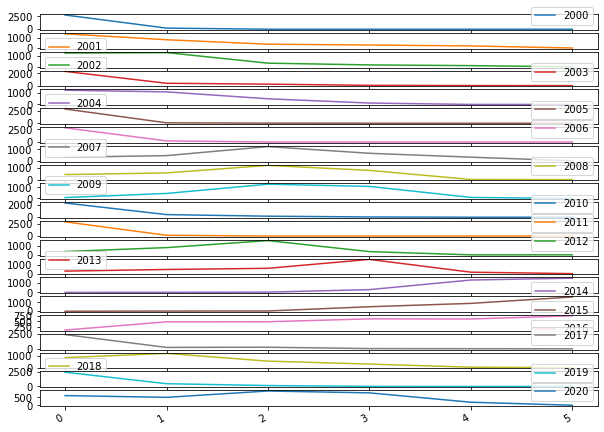

In [ ]:
final.plot(figsize=(10,8),subplots=True)

<AxesSubplot:>

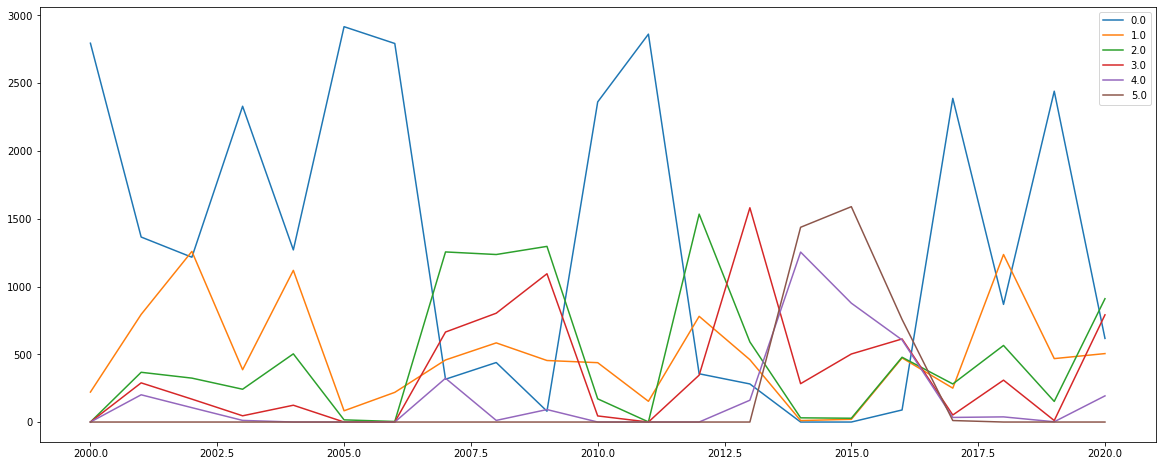

In [ ]:
final_df.plot(figsize=(20,8))

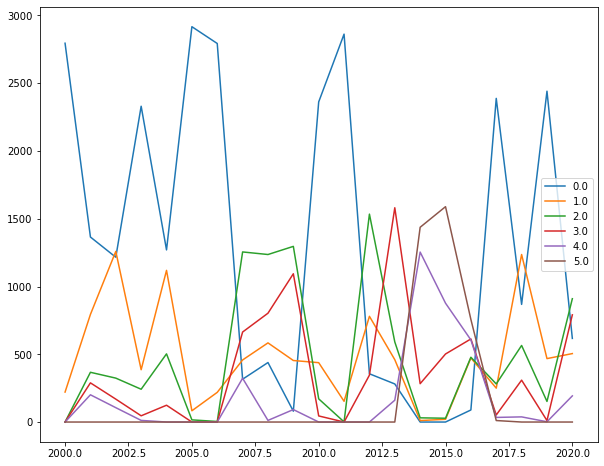

In [ ]:
lines = final_df.plot(figsize=(10,8), kind='line')


In [ ]:
#counts=[]
#for i in year:
 #   x=df[df['date'].dt.year == i]['score']
#     print(x)
  #  counts.append(x.value_counts())
    #counts.append(y)
    #print(y)
    #print(i)
#print(counts)
#y.plot(kind='bar')

In [ ]:
f['date'] = pd.to_datetime(f.date, format='%Y-%m-%d')

In [ ]:
import datetime as dt
dataframe=f[f['date'].dt.year >= 2014]

In [ ]:
dataframe


,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
5114,8,6001,2014-01-01,0.00,100.09,3.91,9.88,0.27,0.33,16.73,...,6.27,0.98,2.13,0.22,1.91,1.35,2.63,0.33,2.31,NaN
5115,7,6001,2014-01-02,0.00,99.94,4.25,10.44,1.41,1.44,17.70,...,7.47,1.54,2.11,0.17,1.94,2.11,3.15,0.21,2.95,NaN
5116,6,6001,2014-01-03,0.00,99.60,4.65,11.95,2.66,2.68,18.70,...,8.39,1.04,1.77,0.27,1.50,1.40,2.74,0.33,2.41,NaN
5117,5,6001,2014-01-04,0.00,99.61,4.67,10.13,2.51,2.54,18.19,...,7.55,1.90,3.19,0.71,2.48,2.74,4.46,1.02,3.44,NaN
5118,4,6001,2014-01-05,0.00,100.03,3.56,9.58,-1.23,-1.14,18.43,...,6.84,2.09,2.93,1.20,1.74,3.00,4.15,2.04,2.11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444913,437633,6115,2020-12-27,0.00,95.37,4.26,5.23,0.91,3.07,11.49,...,4.87,3.17,4.42,1.44,2.97,5.47,7.78,2.43,5.36,NaN
444914,437632,6115,2020-12-28,0.36,95.13,4.26,5.70,0.89,3.29,10.51,...,5.25,2.21,4.35,0.98,3.37,3.90,7.64,1.03,6.61,NaN
444915,437631,6115,2020-12-29,0.00,96.29,3.41,4.37,-2.01,1.18,13.20,...,3.75,2.78,3.90,0.49,3.41,5.01,7.50,1.01,6.49,3.2744
444916,441446,6115,2020-12-30,8.48,96.44,3.43,5.86,-1.93,1.97,11.15,...,4.69,3.08,4.53,2.49,2.04,5.17,6.86,3.29,3.57,NaN


In [ ]:
dataframe = dataframe[dataframe['score'].notna()]
dataframe

,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
5120,2,6001,2014-01-07,0.00,100.06,5.61,10.15,4.85,4.87,17.95,...,8.56,1.99,2.87,0.72,2.15,3.03,4.79,0.99,3.80,3.0691
5127,54,6001,2014-01-14,0.00,100.81,3.28,8.87,-2.02,-1.91,18.89,...,7.05,2.58,3.15,2.00,1.16,4.02,5.76,2.77,2.98,4.0000
5134,47,6001,2014-01-21,0.00,100.22,3.24,11.03,-2.28,-2.16,19.70,...,7.61,1.78,2.77,0.17,2.59,2.46,4.04,0.25,3.79,4.0000
5141,40,6001,2014-01-28,0.00,100.18,7.85,11.97,10.31,10.31,17.34,...,11.72,2.47,3.42,1.79,1.63,4.00,5.49,2.02,3.47,4.0000
5148,33,6001,2014-02-04,0.00,99.87,4.64,6.94,2.68,2.69,13.25,...,6.96,2.28,2.98,1.59,1.39,3.42,4.96,2.07,2.89,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444887,437630,6115,2020-12-01,0.00,96.20,4.52,9.62,1.83,5.72,18.39,...,8.93,2.80,4.75,0.14,4.61,4.77,7.98,0.55,7.43,3.2744
444894,437652,6115,2020-12-08,0.00,96.20,3.43,10.75,-2.08,4.33,20.18,...,9.36,3.09,5.07,0.54,4.52,5.10,8.42,0.76,7.66,3.2744
444901,437659,6115,2020-12-15,0.11,96.52,3.65,5.28,-1.05,2.12,10.91,...,3.85,2.37,3.82,0.53,3.29,3.98,7.07,0.67,6.40,3.2744
444908,437638,6115,2020-12-22,0.01,96.10,3.99,5.48,0.12,2.80,13.15,...,4.39,2.50,4.15,1.00,3.15,4.29,7.48,1.47,6.01,3.2744


In [ ]:
b = dataframe['score']

In [ ]:
a = b.round()
a


5120      3.0
5127      4.0
5134      4.0
5141      4.0
5148      4.0
         ... 
444887    3.0
444894    3.0
444901    3.0
444908    3.0
444915    3.0
Name: score, Length: 21170, dtype: float64

In [ ]:
z = a.value_counts() #2014-2020
z

0.0    6403
5.0    3794
4.0    3004
1.0    2963
3.0    2561
2.0    2445
Name: score, dtype: int64

<AxesSubplot:>

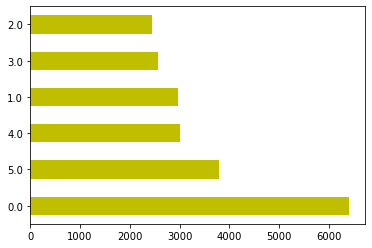

In [ ]:
z.plot(kind="barh",color='y')

In [ ]:
dataframe1=f[f['date'].dt.year <= 2013]

In [ ]:
dataframe1 #2000-2013

,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,0,6001,2000-01-01,0.12,99.77,5.97,7.89,6.28,6.28,10.21,...,7.72,3.01,5.03,0.46,4.57,4.55,8.58,0.76,7.82,NaN
1,5753,6001,2000-01-02,0.00,100.53,4.46,6.04,2.01,2.04,12.50,...,6.06,3.13,4.61,2.00,2.61,4.82,6.20,2.71,3.49,NaN
2,4620,6001,2000-01-03,0.10,100.92,4.85,7.73,3.39,3.40,15.06,...,7.67,2.42,3.43,1.36,2.07,3.39,4.74,2.15,2.59,NaN
3,5120,6001,2000-01-04,0.27,100.90,6.11,8.36,6.77,6.77,14.18,...,8.24,1.92,2.84,1.15,1.69,2.96,5.17,1.30,3.87,0.6079
4,5119,6001,2000-01-05,0.00,100.52,4.13,7.32,0.75,0.81,14.78,...,7.13,4.56,7.48,2.70,4.79,6.94,9.41,4.66,4.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442356,444305,6115,2013-12-27,0.00,96.27,2.89,10.34,-4.42,-4.23,16.51,...,6.64,1.79,3.35,0.05,3.30,3.11,6.58,0.13,6.44,NaN
442357,444306,6115,2013-12-28,0.00,95.95,2.88,10.00,-4.38,-4.21,19.89,...,7.39,3.14,4.81,0.84,3.97,5.33,9.19,1.09,8.10,NaN
442358,444307,6115,2013-12-29,0.00,96.11,2.36,9.35,-6.93,-6.59,18.36,...,8.23,2.89,4.50,0.48,4.02,4.89,7.96,0.03,7.93,NaN
442359,444308,6115,2013-12-30,0.00,96.34,2.88,9.55,-4.40,-4.23,16.13,...,7.28,2.32,3.58,0.80,2.78,3.79,6.98,1.46,5.52,NaN


In [ ]:
dataframe1 = dataframe1[dataframe1['score'].notna()]
dataframe1

,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
3,5120,6001,2000-01-04,0.27,100.90,6.11,8.36,6.77,6.77,14.18,...,8.24,1.92,2.84,1.15,1.69,2.96,5.17,1.30,3.87,0.6079
10,5113,6001,2000-01-11,6.90,99.80,7.43,10.08,9.46,9.46,12.59,...,9.69,4.97,7.88,2.31,5.56,7.38,10.33,4.67,5.66,0.5036
17,5106,6001,2000-01-18,10.43,99.69,8.63,12.74,11.69,11.69,16.40,...,11.84,3.00,4.49,1.29,3.20,4.71,6.91,2.19,4.72,0.0000
24,5099,6001,2000-01-25,3.10,99.67,7.18,10.59,8.97,8.97,14.25,...,10.62,2.63,4.22,0.57,3.64,4.16,6.35,1.10,5.26,0.0000
31,5137,6001,2000-02-01,0.17,100.54,7.41,11.79,9.48,9.48,17.36,...,11.21,1.23,1.76,0.17,1.59,1.77,2.72,0.15,2.57,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442332,444443,6115,2013-12-03,1.05,95.07,4.08,5.62,-1.27,-1.15,10.54,...,5.61,2.25,4.35,0.84,3.51,3.92,6.72,0.97,5.75,3.0000
442339,444450,6115,2013-12-10,0.00,96.49,2.70,2.88,-5.54,-5.36,11.88,...,1.36,2.34,3.47,1.08,2.39,3.93,6.37,1.40,4.97,3.0000
442346,444320,6115,2013-12-17,0.00,96.09,4.02,11.55,-0.10,-0.03,18.38,...,9.70,2.64,3.91,0.78,3.14,4.76,7.61,1.55,6.06,3.0000
442353,444302,6115,2013-12-24,0.00,96.55,4.13,10.65,0.38,0.44,20.36,...,9.98,3.08,5.01,0.83,4.18,5.11,8.08,1.31,6.77,3.0000


In [ ]:
b1 = dataframe1['score']
b1

3         0.6079
10        0.5036
17        0.0000
24        0.0000
31        0.0000
           ...  
442332    3.0000
442339    3.0000
442346    3.0000
442353    3.0000
442360    3.0000
Name: score, Length: 42398, dtype: float64

In [ ]:
a1 = b1.round()
a1

3         1.0
10        1.0
17        0.0
24        0.0
31        0.0
         ... 
442332    3.0
442339    3.0
442346    3.0
442353    3.0
442360    3.0
Name: score, Length: 42398, dtype: float64

In [ ]:
z1 = a1.value_counts()
z1 #2000-2013

0.0    21382
2.0     7540
1.0     7408
3.0     5161
4.0      907
Name: score, dtype: int64

In [ ]:
past=pd.DataFrame(z1).sort_index()

past.loc[len(past.index)] = [0]

In [ ]:
past

,score
0.0,21382
1.0,7408
2.0,7540
3.0,5161
4.0,907
5.0,0


In [ ]:
present=pd.DataFrame(z).sort_index()
present = present.rename(columns={'score': 'score_2'})
present

,score_2
0.0,6403
1.0,2963
2.0,2445
3.0,2561
4.0,3004
5.0,3794


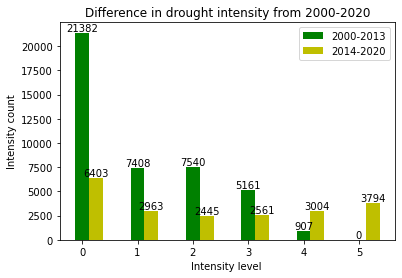

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
# set width of bar
width = 0.25
p=past['score']
pr=present['score']
# Set position of bar on X axis
X = np.arange(0,6)
plt.title("Difference in drought intensity from 2000-2020")
bar1= plt.bar(X, p, color ='g', width = width,label ='2000-2013')
bar2= plt.bar(X + 0.25, pr, color ='y', width = width, label ='2014-2020')
# plt.annotate(past['score'])
#Adding Y label
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.xlabel('Intensity level ')
 
plt.ylabel('Intensity count')
plt.legend()

In [ ]:
co=pd.DataFrame(past)
co['percent'] = (((co['score'] / 
                  co['score'].sum()) * 100).apply(np.ceil))

co


# c.append(present, ignore_index = True)

,score,percent
0.0,21382,51.0
1.0,7408,18.0
2.0,7540,18.0
3.0,5161,13.0
4.0,907,3.0
5.0,0,0.0


In [ ]:
cop= pd.DataFrame(present)
#co=pd.DataFrame(past)
cop['percent1'] = (((cop['score_2'] / 
                  cop['score_2'].sum()) * 100).apply(np.ceil))
#cop['percent1'].apply(np.ceil)

cop



,score_2,percent1
0.0,6403,31.0
1.0,2963,14.0
2.0,2445,12.0
3.0,2561,13.0
4.0,3004,15.0
5.0,3794,18.0


In [ ]:
# # c.append(cop)
# cols = ['score_2']
# c.join(cop.set_index(cols), on=cols)
# # c.merge(cop)
# # df.merge(df2, how='left')
result=pd.DataFrame()
result['2000-2013']=co['percent']
result['2014-2020']=cop['percent1']

result

,2000-2013,2014-2020
0.0,51.0,31.0
1.0,18.0,14.0
2.0,18.0,12.0
3.0,13.0,13.0
4.0,3.0,15.0
5.0,0.0,18.0


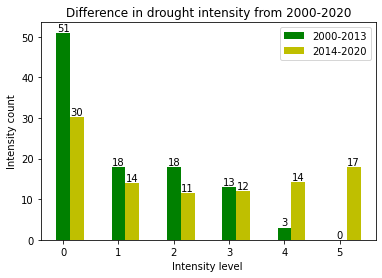

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
# set width of bar
width = 0.25
p=past['percent']
pr=present['percent1']
# Set position of bar on X axis
X = np.arange(0,6)
plt.title("Difference in drought intensity from 2000-2020")
bar1= plt.bar(X, p, color ='g', width = width,label ='2000-2013')
bar2= plt.bar(X + 0.25, pr, color ='y', width = width, label ='2014-2020')
# plt.annotate(past['score'])
#Adding Y label
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.xlabel('Intensity level ')
 
plt.ylabel('Intensity count')
plt.legend()

In [ ]:
per_change= result.pct_change(axis='columns')

In [ ]:

per_change= per_change.drop(5.0)
per_change

In [ ]:
color = (per_change['2014-2020'] > 0).apply(lambda x: 'g' if x else 'r')
ax = per_change['2014-2020'].plot.bar(figsize=(20,8), color=color)
# plt.text(per_change['2014-2020'],)
for p in ax.patches: # set data point labels
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + 0.2, max(p.get_height(), 0)+0.02))
                
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))                
# per_change['2014-2020'].hist()

In [ ]:
result.plot.bar(figsize=(20,8))


In [ ]:
past.plot.bar()
present.plot.bar()

In [ ]:
z1.plot(kind="barh",color='y')